#Libraries and data

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [ ]:
def read_xyz(file_name):
  # a2s  = np.loadtxt(file_name, usecols=[0], dtype=str)
  xyz = np.loadtxt(file_name, usecols=[0,1,2])
  return xyz 

In [ ]:
methods = ['ICP', 'Tr-ICP']

In [ ]:
ang_dist = [[0.378727,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.3787,0.378],
            [0.402254,0.4022,0.4022,0.4022,0.4022,0.4055,0.402254,0.40225,0.402254,0.402254],
            [0.946865,1.56058,2.35561,0.740998,2.3066,1.2648,2.97505,2.50283,3.12456,2.976],
            [2.8009,3.03776,1.13258,1.2517,1.84372,2.2583,3.11546,2.50459,2.7923,2.5056],
            [2.42589,1.39926,1.91502,2.93352,1.99377,2.32537,2.57508,0.88107,2.26812,2.0457],
            [1.29397,2.01082,1.67812,3.03975,3.03435,2.51,2.78544,2.59644,1.98515,1.0919]]

In [ ]:
transl_err_mse = [[0.0654006,0.0654,0.0654,0.0654,0.0654,0.0654,0.0654,0.0654,0.654,0.0654],
              [0.0068663,0.0068,0.0068,0.0068,0.0068,0.0068,0.00686,0.00686,0.0068,0.006866],
              [0.531956,1.24834,0.140389,3.78652,0.820596,0.8782,0.6506,1.2955,0.823741,0.7455],
              [1.92159,1.77078,1.5184,8.88924,5.17554,1.2569,2.56423,2.01718,4.1559,0.3134],
              [0.865857,0.244406,0.6239,0.244233,3.92135,0.280533,0.5132,0.1881,1.0485,0.746093],
              [2.8151,2.10688,0.328313,0.929793,0.1668,0.2459,0.662292,2.51488,3.1857,1.014]]

transl_err_euc = [[0.442946723658726,0.442944691807002,0.442944691807002,0.442944691807002,0.442944691807002,0.442944691807002,0.442944691807002,0.442944691807002,1.40071410359145,0.442944691807002],
[0.143523168861338,0.142828568570857,0.142828568570857,0.142828568570857,0.142828568570857,0.142828568570857,0.143457310723434,0.143457310723434,0.142828568570857,0.143520033444812],
[1.26327669178213,1.93520541545336,0.648973805326532,3.37039463564729,1.56900860418291,1.62314509517788,1.39706835910058,1.97142080743813,1.57201240453121,1.49549322967374],
[2.40099354434784,2.30485140518863,2.13429145151266,5.16407978249756,3.94038323009324,1.94182903469899,2.7735699017692,2.45998780484782,3.53096304143785,0.969639108122192],
[1.61169817273583,0.856281495771104,1.36810087347388,0.85597838757763,3.42987609105635,0.917387050268315,1.24080618953969,0.751199041532935,1.77355575046289,1.49608789848725],
[2.9060798337279,2.51408830393843,0.992440930232122,1.6701434070163,0.707389567353096,0.858894638474359,1.40956589062023,2.7467508077727,3.09145596766313,1.74413302244984]]

In [ ]:
run_time = [[2.82655,2.53,2.51422,2.4979,2.49,2.51,2.52,2.5199,2.496,2.489],
            [3.34359,2.69,2.675,2.6668,2.654,2.69,2.712,2.692,2.662,2.68666],
            [4.30817,1.74255,0.926,2.02322,0.935898,0.7277729,1.5657,0.7785,1.2865,2.448],
            [5.7878,2.47531,1.46053,1.9315,2.34021,1.2362,2.26684,1.25354,1.523,2.1548],	
            [1.26487,0.74693,1.2135,1.43919,1.806,1.2422,0.797186,1.429,1.3774,1.7909],
            [0.36309,1.5196,1.9425,1.6715,1.306,1.60236,1.2559,1.5856,1.2889,2.3448]]

In [ ]:
iteration=[[5,5,5,5,5,5,5,5,5,5],
            [4,4,4,4,4,4,4,4,4,4],
            [15,5,2,9,3,2,6,2,4,11],
            [11,4,2,4,5,2,5,2,3,5],
            [4,2,4,5,7,4,2,5,5,7],
            [2,3,4,3,2,3,2,3,2,5]]

#Comparison

I used a single point cloud and transformed myself with the following transformation matrix (the ground truth):<br>

 $T =
 \begin{pmatrix}
  0.969858 & -0.123468 & 0.210076 & 1.3 \\
  0.170979 & 0.959081 & -0.225678 & 0.5 \\
  -0.173616 & 0.254794 & 0.951282 & 1 \\
  0 & 0 & 0 & 1
 \end{pmatrix}$

 Meaning a rotation of roll = 20, pitch = 10, yaw = 10 degrees.


Below is the obtained data after 10 runs with 3 different noise levels.
Although noise level could have been interpreted as setting the sigma value for the normal distribution, I chose to associate it with the number of random points added to the point cloud.

The parameters for the distribution: <br>
const double **mean = 0.0**; <br>
const double **stddev = 0.5**;<br>

I used n=0, n=0.2 and n=0.5, these numbers control the amomunt of random points generated (point cloud rows * n = number of points to be added).

In [ ]:
dragon = read_xyz('/content/drive/MyDrive/dragon_test.xyz')

In [ ]:
dragon.shape

(41841, 3)

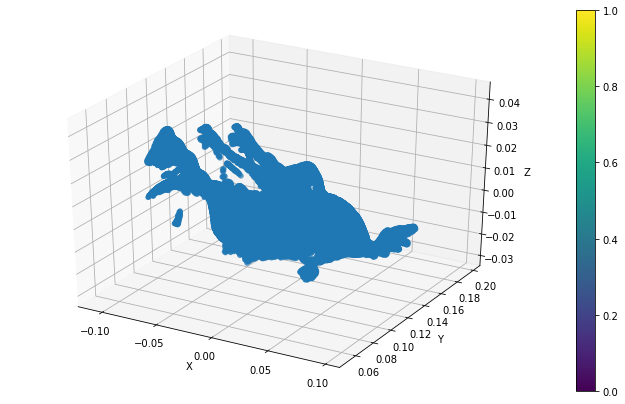

In [ ]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection='3d')
img = ax.scatter(dragon[:,0], dragon[:,1], dragon[:,2])
fig.colorbar(img)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

##Angular distance

Calculated with the built in function angularDistance of the quaternion class in Eigen library.

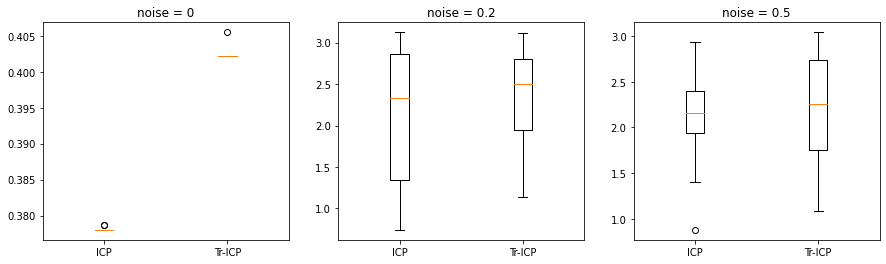

In [ ]:
# fig = plt.figure(figsize =(10, 7))
fig, axs = plt.subplots(1,3,figsize=(15, 4))

axs[0].boxplot(ang_dist[0:2], labels=methods)
axs[0].set_title("noise = 0")
axs[1].boxplot(ang_dist[2:4], labels=methods)
axs[1].set_title("noise = 0.2")
axs[2].boxplot(ang_dist[4:6], labels=methods)
axs[2].set_title("noise = 0.5")
 
# show plot
plt.show()

##Translation error

###Eucledian

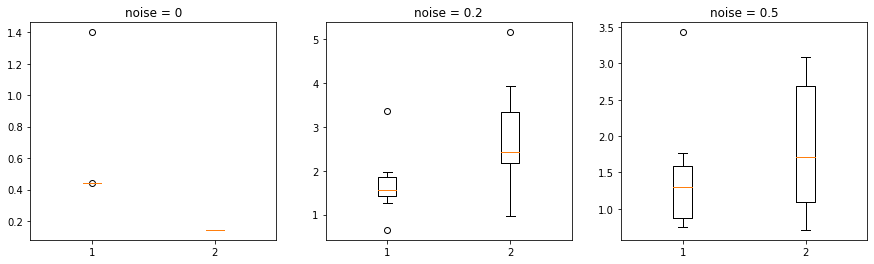

In [ ]:
# fig = plt.figure(figsize =(10, 7))
fig, axs = plt.subplots(1,3,figsize=(15, 4))

axs[0].boxplot(transl_err_euc[0:2])
axs[0].set_title("noise = 0")
axs[1].boxplot(transl_err_euc[2:4])
axs[1].set_title("noise = 0.2")
axs[2].boxplot(transl_err_euc[4:6])
axs[2].set_title("noise = 0.5")
 
# show plot
plt.show()

###MSE

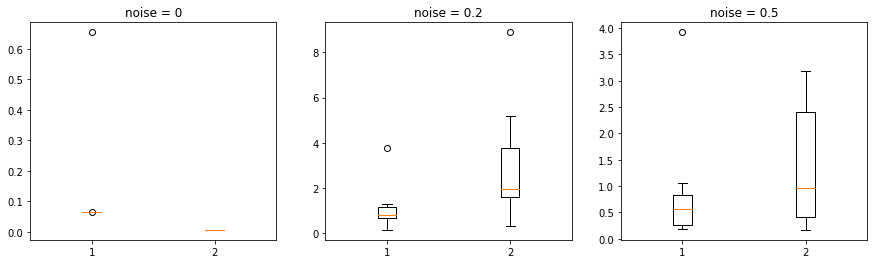

In [ ]:
# fig = plt.figure(figsize =(10, 7))
fig, axs = plt.subplots(1,3,figsize=(15, 4))

axs[0].boxplot(transl_err_mse[0:2])
axs[0].set_title("noise = 0")
axs[1].boxplot(transl_err_mse[2:4])
axs[1].set_title("noise = 0.2")
axs[2].boxplot(transl_err_mse[4:6])
axs[2].set_title("noise = 0.5")
 
# show plot
plt.show()

##Runtime & number of iterations

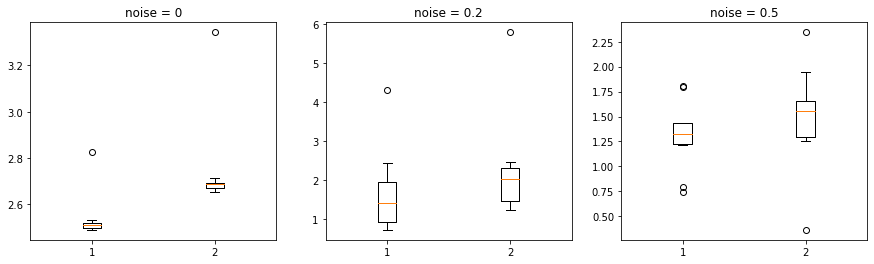

In [ ]:
# fig = plt.figure(figsize =(10, 7))
fig, axs = plt.subplots(1,3,figsize=(15, 4))

axs[0].boxplot(run_time[0:2])
axs[0].set_title("noise = 0")
axs[1].boxplot(run_time[2:4])
axs[1].set_title("noise = 0.2")
axs[2].boxplot(run_time[4:6])
axs[2].set_title("noise = 0.5")
 
# show plot
plt.show()

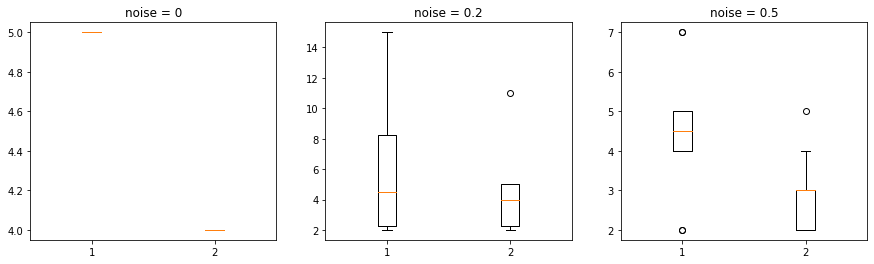

In [ ]:
# fig = plt.figure(figsize =(10, 7))
fig, axs = plt.subplots(1,3,figsize=(15, 4))

axs[0].boxplot(iteration[0:2])
axs[0].set_title("noise = 0")
axs[1].boxplot(iteration[2:4])
axs[1].set_title("noise = 0.2")
axs[2].boxplot(iteration[4:6])
axs[2].set_title("noise = 0.5")
 
# show plot
plt.show()

#Application for trajectory estimation

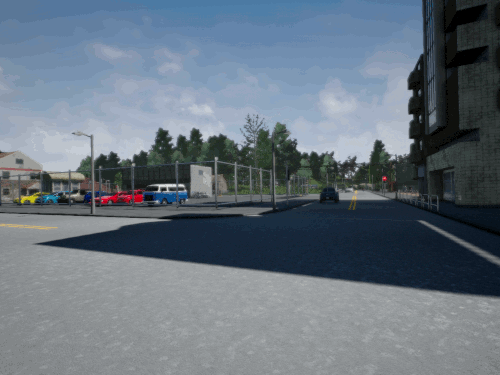

In [21]:
# !wget -O trajectory.gif https://www.dropbox.com/s/uizm7n86gcqfh2g/trajectory_small.gif?dl=0
Image(open('trajectory.gif','rb').read())

For some reason, the X axis is running into positive values, which is clearly wrong. My assumption is that when I converted the .dat depth values to point cloud values, a negative sign was missed...

Average iteration number for a frame pair: 49.26<br>
min: 18 <br>
max: 86 <br>
stdev: 18.35

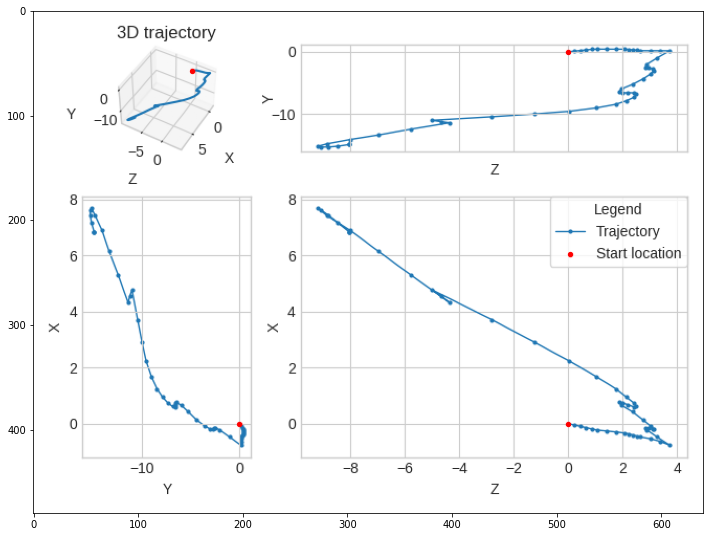

In [7]:
plt.figure(figsize=(12,12))
img = plt.imread('trajectory.png')
imgplot = plt.imshow(img)

plt.show()